<a href="https://colab.research.google.com/github/kaung-yarzar/Loan_Approval_Prediction/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Importing Libraries

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno

# 2 - Getting the **Data**

In [ ]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [ ]:
print('rows, cols',df.shape)
print(df.info)

rows, cols (4269, 13)
<bound method DataFrame.info of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate        

# 3 - Data Preprocessing

In [ ]:
# Checking Column Names
print(df.columns)

# Removing unnecessary space from column names
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

nulls
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


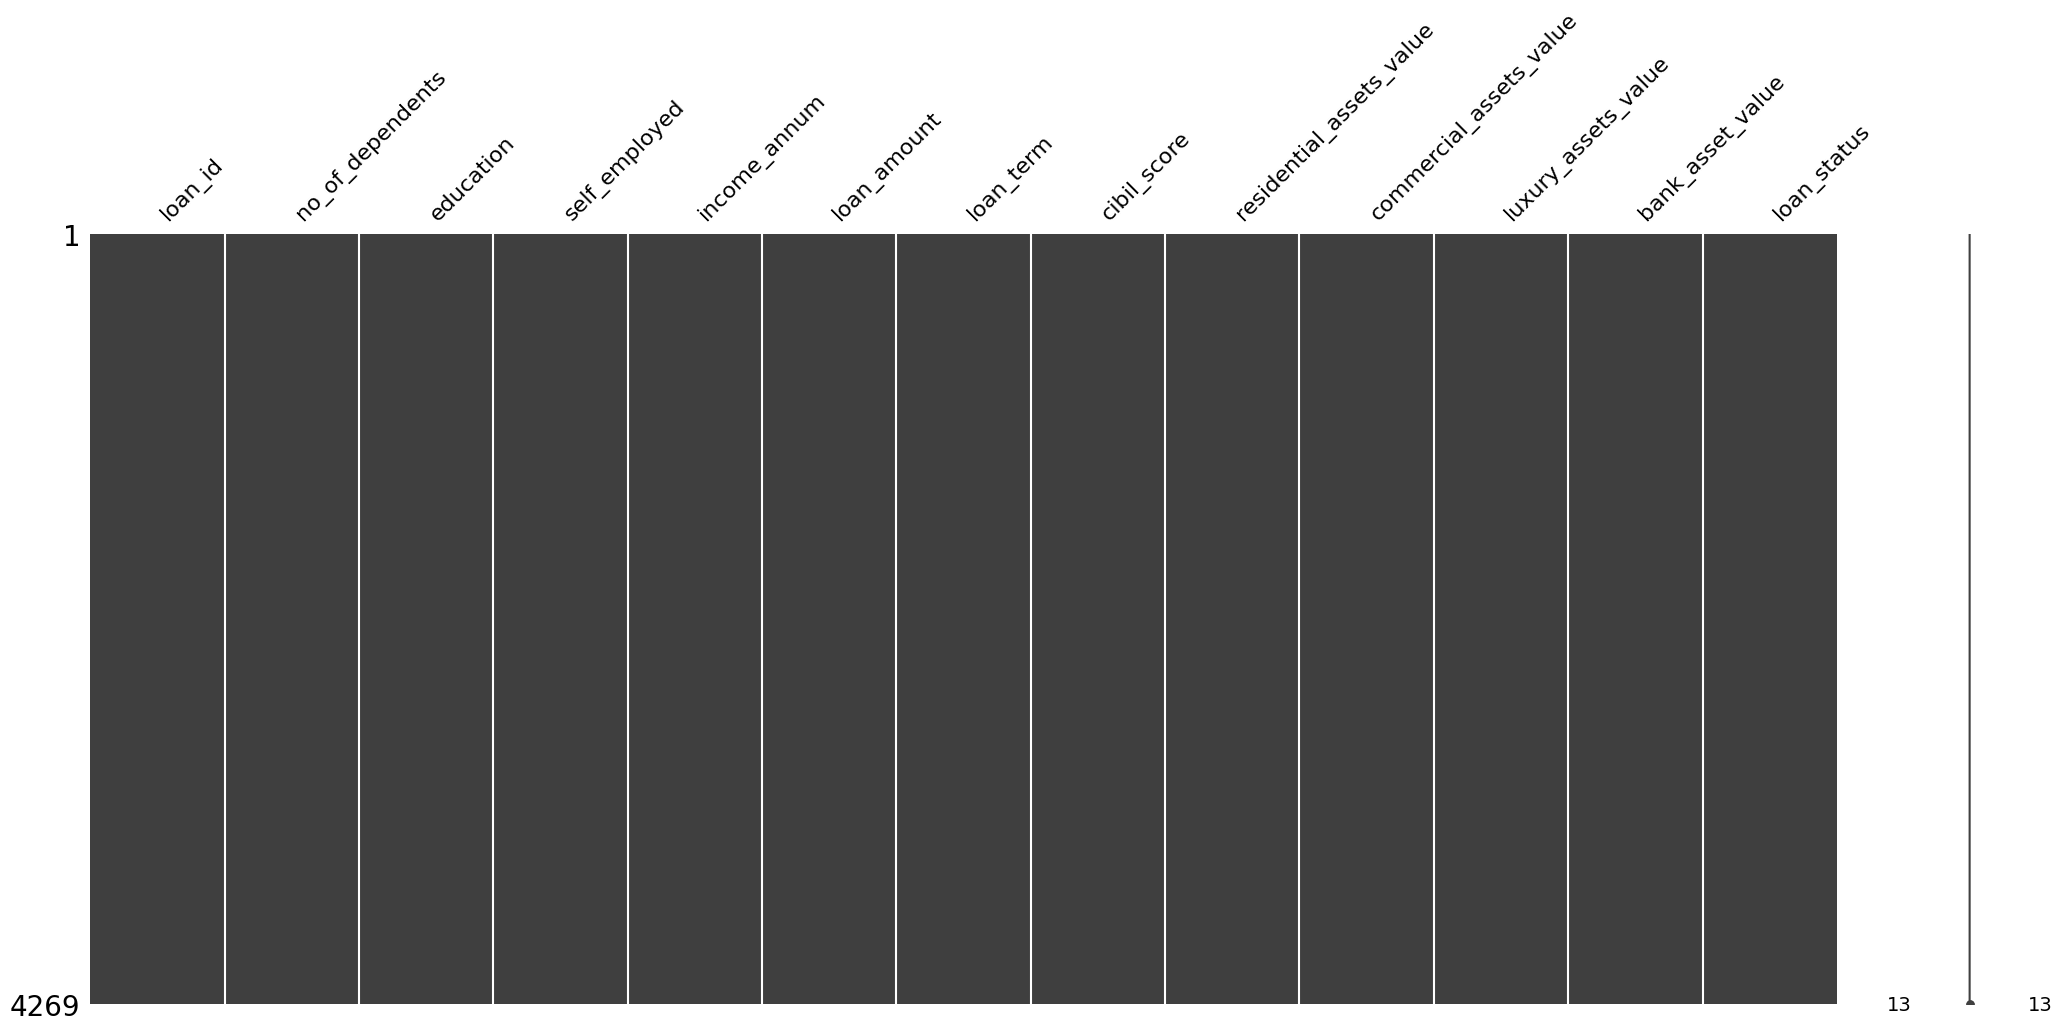

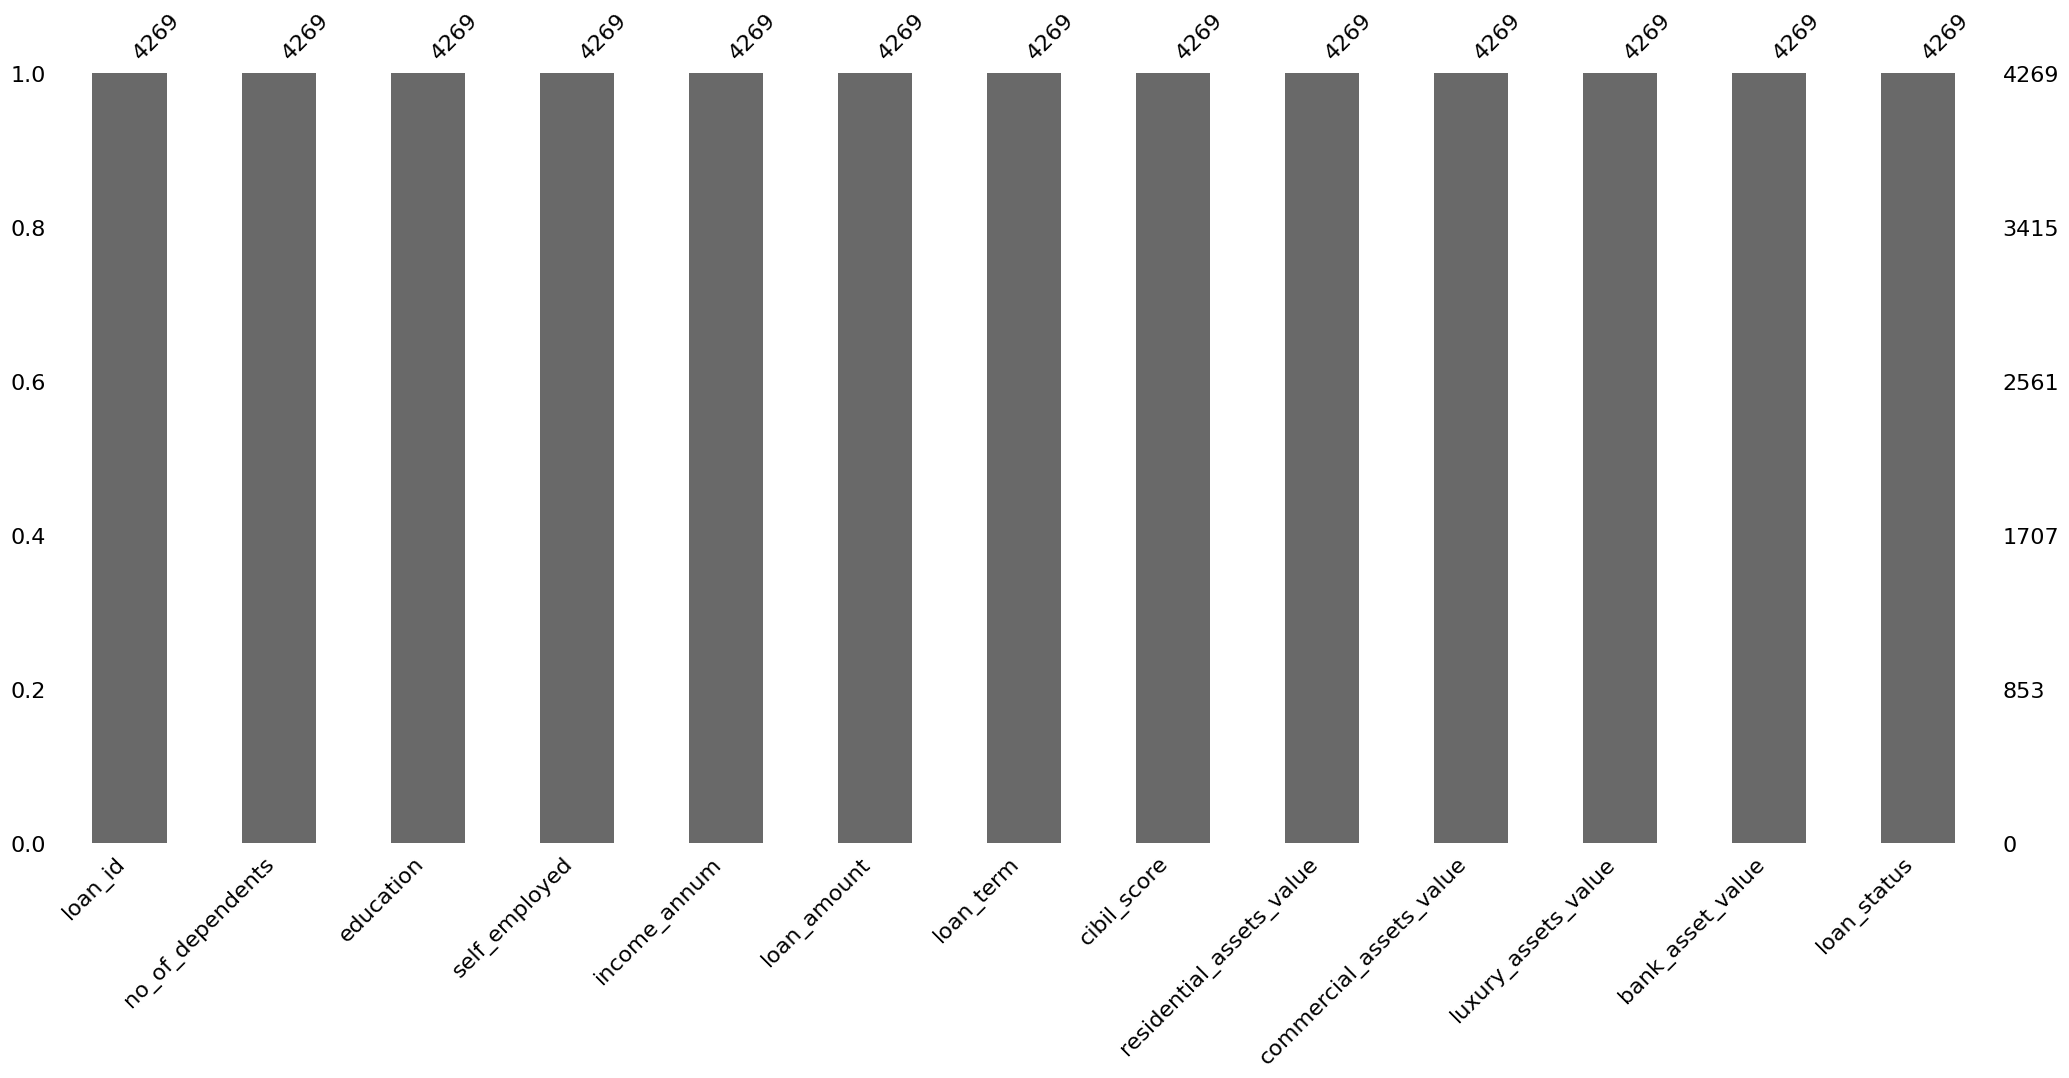


types
 loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [ ]:
# Checking for missing value
print('nulls\n', df.isnull().sum())

msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

# Checking the data types
print('\ntypes\n', df.dtypes)

In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Checking Duplicate values
df.duplicated().sum()

0

In [ ]:
# Checking Unique values
print(df.nunique())
unique_values_in_columns = df.apply(lambda col: col.unique())
print(unique_values_in_columns)

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64
loan_id                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
no_of_dependents                                           [2, 0, 3, 5, 4, 1]
education                                          [ Graduate,  Not Graduate]
self_employed                                                     [ No,  Yes]
income_annum                [9600000, 4100000, 9100000, 8200000, 9800000, ...
loan_amount                 [29900000, 12200000, 29700000, 30700000, 24200...
loan_term                                [12, 8, 20, 10, 4, 2, 18, 16, 14, 6]
cibil_score 

# 5 - Data Visualization

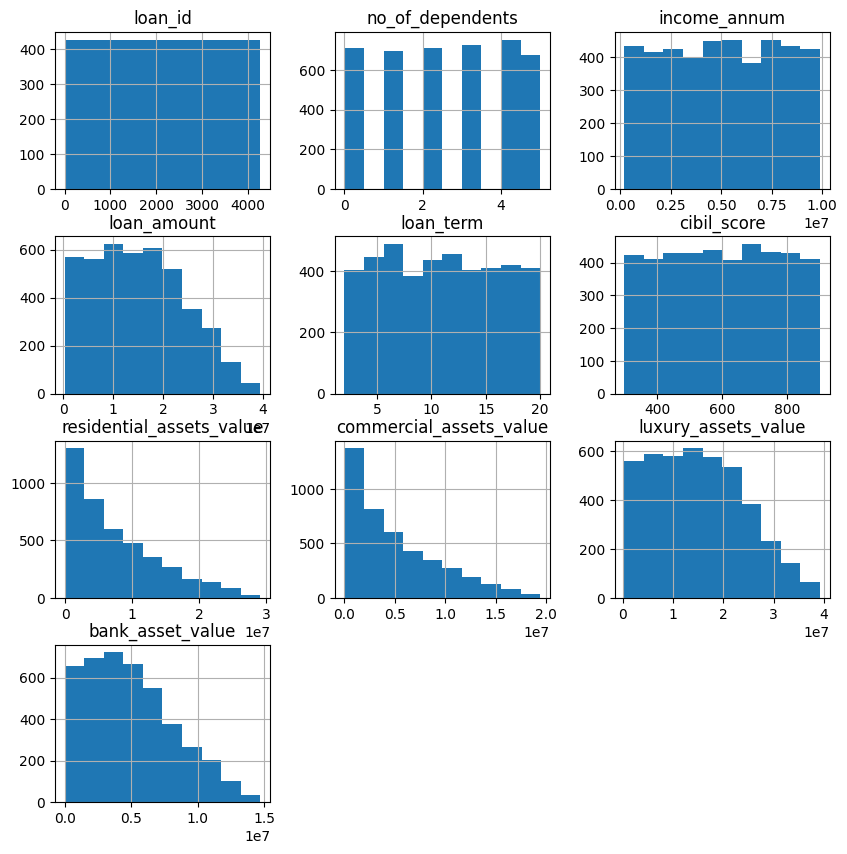

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

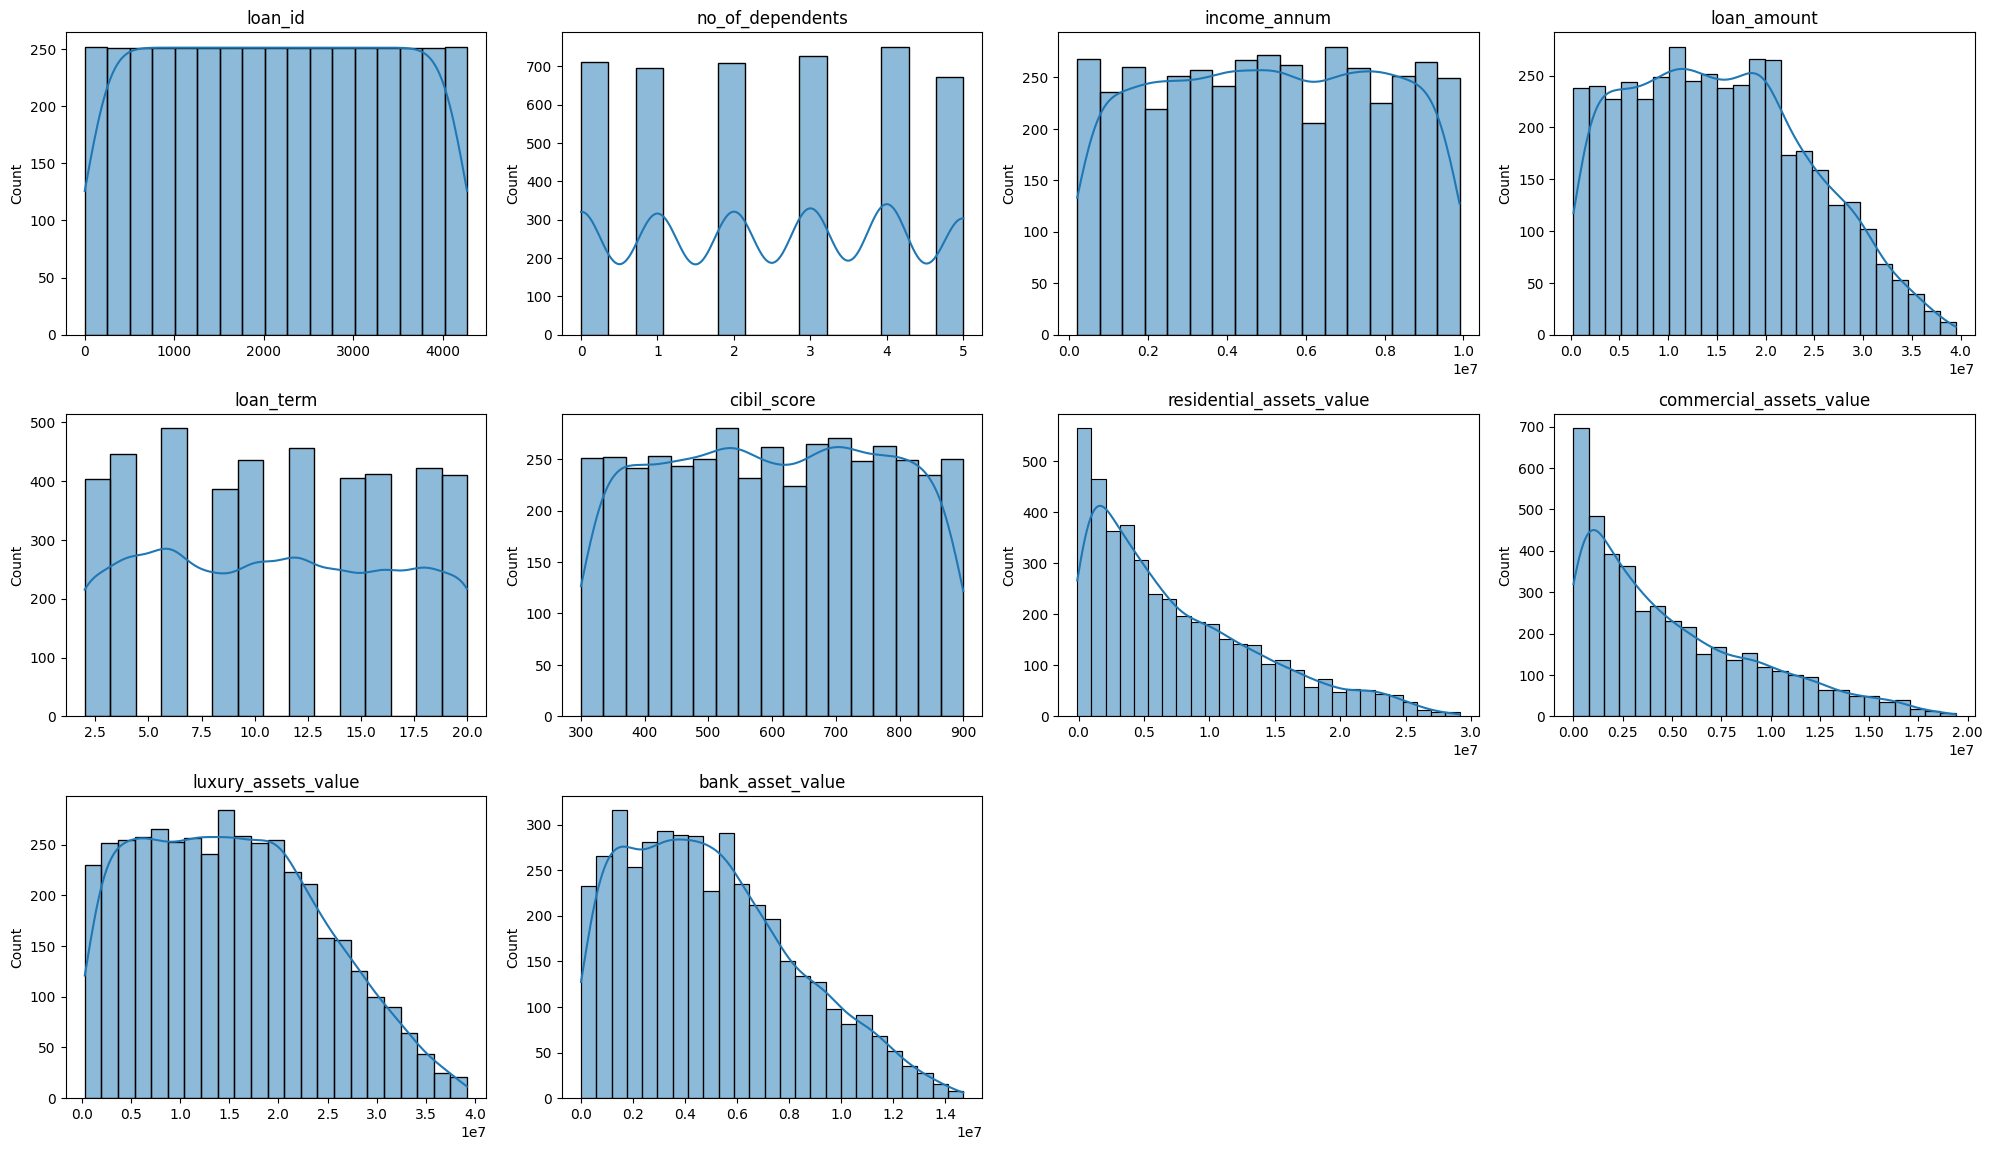

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

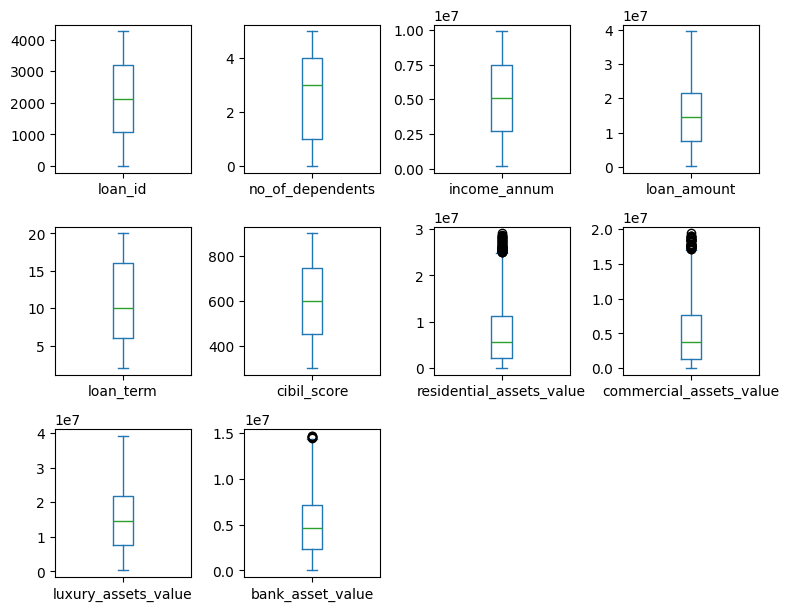

In [ ]:
# Checking Outliers
df.plot(kind='box', figsize= (8,8), layout=(4,4),subplots= True)
plt.tight_layout()

In [ ]:
# Outlier Detacted
# *** I need to work on removing outliers later ***
Q1 = df['residential_assets_value'].quantile(0.25)
Q3 = df['residential_assets_value'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['residential_assets_value'] >= lower_bound) & (df['residential_assets_value'] <= upper_bound)]

print("Data without outliers:")
print(df_no_outliers)

Lower bound: -11450000.0, Upper bound: 24950000.0
Data without outliers:
      loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       92

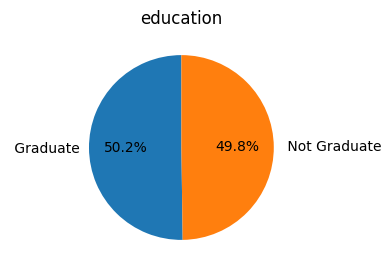

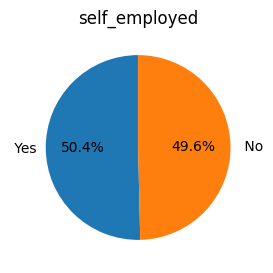

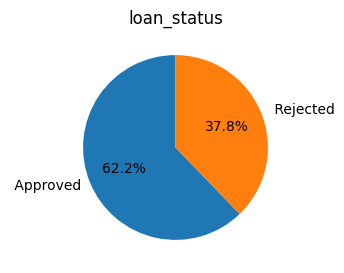

In [ ]:
object_type_columns = df.select_dtypes(include='object')
for col_name in object_type_columns:
  counts = df[col_name].value_counts()
  plt.figure(figsize=(3,3))
  plt.pie(counts,
          labels=counts.index,
          autopct='%1.1f%%',
          startangle=90)
  plt.title(col_name)
  plt.show()

  # Imbalanced dataset (still acceptable) *** Need to work on that later using SMOTE***

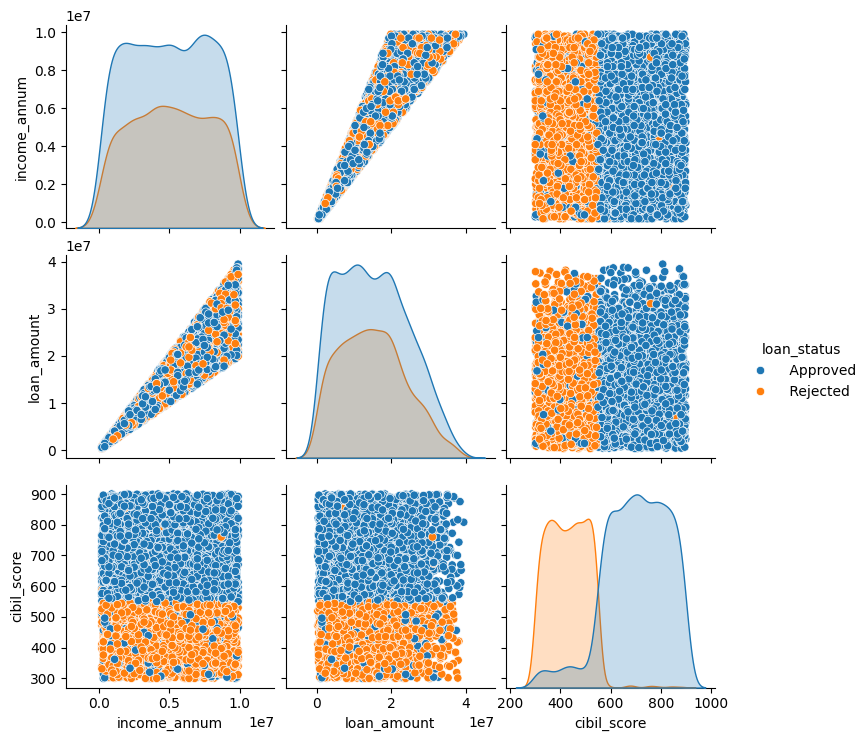

In [ ]:
sns.pairplot(df[['income_annum', 'loan_amount', 'cibil_score', 'loan_status']], hue='loan_status')
plt.show()


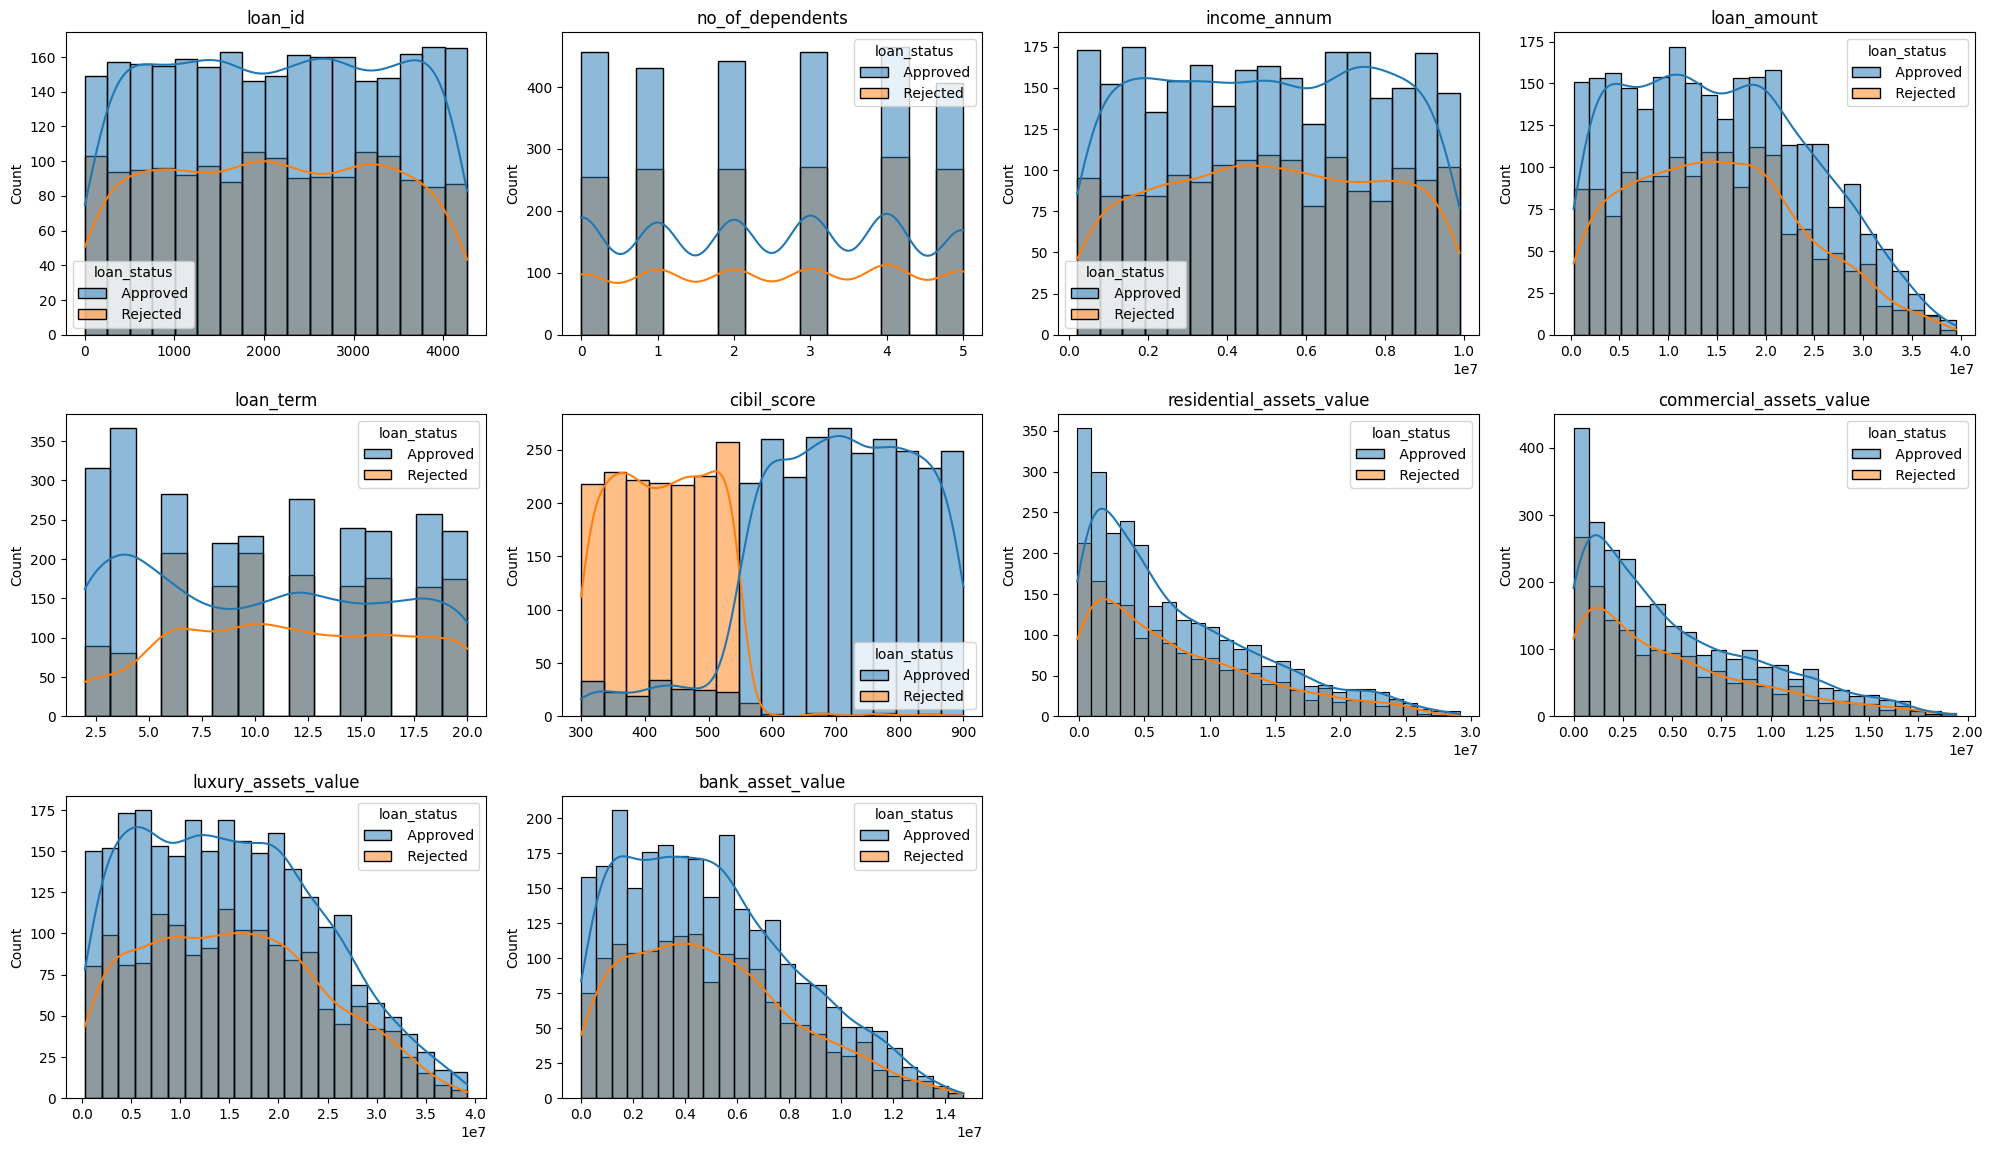

In [ ]:

numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True, hue='loan_status')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# 6 - Model Training and Evaluation





In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Encoding and Decoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# KNN
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Support Vector Machine
from sklearn.svm import SVC
# Navie Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


#Grid Search CV
from sklearn.model_selection import GridSearchCV


## Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [ ]:
# ID is not an acceptable feature
df = df.drop(columns="loan_id")

In [ ]:

# Feature Selection
X = df.drop('loan_status', axis=1)

# Output Selection and Encoding
df['loan_status'] = df['loan_status'].replace({'Approved': 1, 'Rejected': 0})
y = df['loan_status']


# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=42)

# Print the size of the training and testing data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2988, 11) (1281, 11)
(2988,) (1281,)


In [ ]:
# numerical_feature = ['no_of_dependents', 'income_annum', 'loan_amount','loan_term', 'cibil_score', 'residential_assets_value','commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
# categorical_feature =  ['education', 'self_employed']


# Getting Numerical Feature Columns Names
numerical_feature = X.select_dtypes(include='number').columns
print(numerical_feature)

# Getting Categorical Feature Columns Names
categorical_feature = X.select_dtypes(exclude='number').columns
print(categorical_feature)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
Index(['education', 'self_employed'], dtype='object')


In [ ]:

# Transforming categorical data and scaling numerical data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_feature),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feature)
])

# Creating pipeline
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='rbf', gamma='scale', class_weight='balanced', probability=True))  ])


svc_pipeline.fit(X_train, y_train)



# Evaluation
print('\nSupport Vector Machine')
print('\n---Training Results---\n')
ypred_train = svc_pipeline.predict(X_train)
mat_clf_train = confusion_matrix(y_train, ypred_train)
report_clf_train = classification_report(y_train, ypred_train)

print(mat_clf_train)
print(report_clf_train)

ypred_trainP = svc_pipeline.predict_proba(X_train)
auc_train_svc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc_train_svc)


print('\n---Testing Results---\n')
ypred_test = svc_pipeline.predict(X_test)
mat_clf_test = confusion_matrix(y_test, ypred_test)
report_clf_test = classification_report(y_test, ypred_test)

print(mat_clf_test)
print(report_clf_test)

ypred_testP = svc_pipeline.predict_proba(X_test)
auc_test_svc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc_test_svc)



Support Vector Machine

---Training Results---

[[1713  133]
 [  22 1120]]
              precision    recall  f1-score   support

    Approved       0.99      0.93      0.96      1846
    Rejected       0.89      0.98      0.94      1142

    accuracy                           0.95      2988
   macro avg       0.94      0.95      0.95      2988
weighted avg       0.95      0.95      0.95      2988

0.98740211713498

---Testing Results---

[[724  86]
 [ 17 454]]
              precision    recall  f1-score   support

    Approved       0.98      0.89      0.93       810
    Rejected       0.84      0.96      0.90       471

    accuracy                           0.92      1281
   macro avg       0.91      0.93      0.92      1281
weighted avg       0.93      0.92      0.92      1281

0.9809913239495688
